# Home assignment - Deep Learning (ITLB359, MIB)
---
## Task description
Challenge: Get the best results on the malaria dataset!

> "Malaria contains images from various cells. Some cells are infected with malaria, other cells are not. You can download the dataset. Each image is a different shape in 24-bit colour."

### Your task is as follows:
- Download the dataset from google drive like:
```
!wget "https://drive.google.com/uc?id=1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF&export=download&authuser=0" -O malaria.zip
!unzip malaria.zip
%cd malaria
```
- Convert from image dataset to NumPy array for training:
```
list_of_class1 = os.listdir("Parasitized")
list_of_class0 = os.listdir("Uninfected")

labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels1, labels0), axis=0)

dataset = []
dim = (100, 100)
for img in list_of_class1:
  image = cv2.imread("Parasitized/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

for img in list_of_class0:
  image = cv2.imread("Uninfected/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)
```
- Split to training, validation and test sets.
- Challenge: Get the best results on the malaria dataset!
- The challenge of this task is to get the best results on the malaria dataset by tuning hyperparameters of a NN model and observing convergence behavior.
- Best - for simplicity - means the highest accuracy on the validation set.
- Reflection
- Critically evaluate your work, including other approaches.
- Answer in a markdown cell.

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

**You may NOT manipulate the validation set (that is, you cannot pick and choose which samples belong to the validation set to make your model "perform" better on validation data)!**

### Please observe the following:
- You must use a single standalone Jupyter Notebook to solve the task and submit the .ipynb file.

Note for those working on Google Colab: a link to your notebook will not suffice: you have to download and submit the file itself.
Follow the principle of literate programming, and make use of the markdown cells of the notebook.
### Deadline
Monday, 5 December 2022, 10:00 AM 
### Assessment
The assignment will be assessed based on the following criteria (see the grid on Moodle):
- Specification fulfillment (50%) 
- Literate programming and markdown cells (20%) 
- Conceptual grounding (20%) 
- Clean code (10%) 
The **resit** arrangement for the assignment is the same as above; you may resubmit the same paper, with corrections, that you submitted by the original deadline. The resubmission deadline will be specified on Moodle after the grades for the original submission are published.

Upload your file (.ipynb) to Moodle.

### Academic conduct notice
Where the Academic Conduct Officer has reason to suspect that a piece of work submitted by a student was wholly or in part written by someone other than the student who submitted it, and this has not been disclosed by the student, they may call for the student to defend the work in **viva or a written comprehension test**. The burden of proof in such a viva or test will be upon the student to demonstrate to the examination panel's satisfaction his/her full comprehension of the work s/he has submitted. Failure to appear without satisfactory explanation will result in immediate failure of that assessment, with consequences of academic misconduct and application of sanctions.
___

In [ ]:
# Download the dataset from google drive
!wget "https://drive.google.com/uc?id=1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF&export=download&authuser=0" -O malaria.zip
!unzip malaria.zip
%cd malaria 

WARNING: This might hose your NVIDIA graphics driver so back steps to boot via backup disk, ZFS snapshot, or whatever. You have been warned.

In [33]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

The code down below was provided by the teachers of this unit.

In [19]:
# Convert from image dataset to NumPy array for training
list_of_class1 = os.listdir("malaria/Parasitized")
list_of_class0 = os.listdir("malaria/Uninfected")

labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels1, labels0), axis=0)

dataset = []
dim = (100, 100)
for img in list_of_class1:
  image = cv2.imread("malaria/Parasitized/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

for img in list_of_class0:
  image = cv2.imread("malaria/Uninfected/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

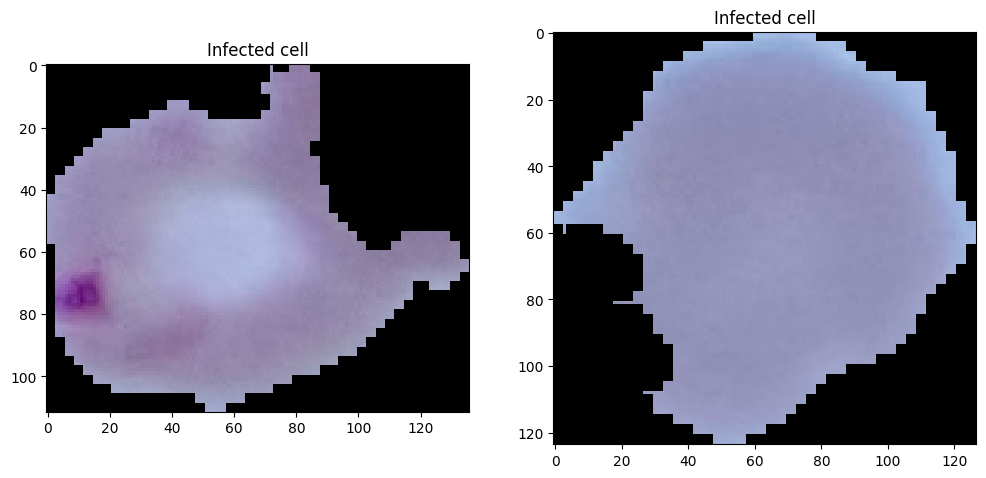

In [20]:
# Visualize the data so we can see what we are working with.
img_infected = cv2.imread('malaria/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_21.png')
img_uninfected = cv2.imread('malaria/Uninfected/C1_thinF_IMG_20150604_104919_cell_84.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title("Infected cell")
ax1.imshow(img_infected)
ax2.set_title("Infected cell")
ax2.imshow(img_uninfected)

In [21]:
width = 128
height = 128

datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.25)
train_data_generator = datagen.flow_from_directory(directory="malaria", target_size = (width, height), 
                                                   class_mode="binary", batch_size = 16, subset = "training")
validation_data_generator = datagen.flow_from_directory(directory="malaria", target_size = (width, height), 
                                                        class_mode="binary", batch_size = 16, subset = "validation")

Found 750 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [22]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(width, height, 3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 16)      

In [40]:
my_callback = EarlyStopping(monitor='val_accuracy',patience=2)

In [41]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator),epochs=100, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

history = model.fit(train_data_generator,
                    steps_per_epoch = len(train_data_generator),
                    epochs =20,
                    validation_data = validation_data_generator,
                    validation_steps=len(validation_data_generator),
                    callbacks=[my_callback])

Epoch 1/20
47/47 [==============================] - 5s 73ms/step - loss: 0.4540 - accuracy: 0.7813 - val_loss: 0.7088 - val_accuracy: 0.7280
Epoch 2/20
47/47 [==============================] - 3s 70ms/step - loss: 0.3603 - accuracy: 0.8413 - val_loss: 0.7117 - val_accuracy: 0.7240
Epoch 3/20
47/47 [==============================] - 3s 59ms/step - loss: 0.3155 - accuracy: 0.8813 - val_loss: 0.5299 - val_accuracy: 0.8000
Epoch 4/20
47/47 [==============================] - 3s 57ms/step - loss: 0.2622 - accuracy: 0.9120 - val_loss: 0.5301 - val_accuracy: 0.7960
Epoch 5/20
47/47 [==============================] - 3s 59ms/step - loss: 0.2087 - accuracy: 0.9280 - val_loss: 0.6234 - val_accuracy: 0.8240
Epoch 6/20
47/47 [==============================] - 3s 58ms/step - loss: 0.1429 - accuracy: 0.9560 - val_loss: 1.6863 - val_accuracy: 0.8480
Epoch 7/20
47/47 [==============================] - 3s 60ms/step - loss: 0.1334 - accuracy: 0.9653 - val_loss: 0.9181 - val_accuracy: 0.8680
Epoch 8/20
47

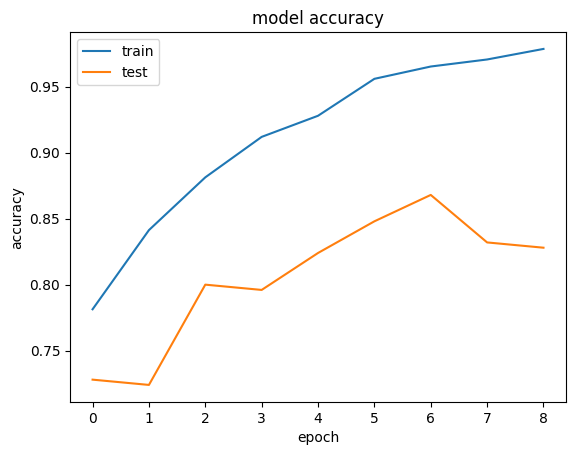

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False